# Classifying movie reviews

In [1]:
from keras.datasets import imdb

Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
type(train_data)

numpy.ndarray

In [5]:
word_index = imdb.get_word_index()

In [6]:
word_index

{'dwarf': 8521,
 "horror's": 24036,
 "nazi's": 15766,
 'barton': 8775,
 'gunfighter': 16647,
 'respectable': 6437,
 "2009's": 69541,
 'hoe': 22446,
 "ross'": 34791,
 'stormtroopers': 16083,
 'racked': 24430,
 'docteur': 62791,
 'conditionally': 62830,
 'chalkboard': 19800,
 'mesmerizingly': 49027,
 'zaroff': 32436,
 'intoned': 81992,
 'bandied': 62231,
 'tidwell': 56698,
 'cliche': 4893,
 'deacon': 57523,
 'frenchfilm': 67408,
 'hurried': 20335,
 'babaganoosh': 52040,
 'gurning': 71027,
 'mgr': 45651,
 'mogule': 70400,
 "sheedy's": 25483,
 'foxley': 78248,
 'handmade': 42544,
 'transients': 65860,
 "roll's": 66105,
 '3500': 86064,
 'bedfellows': 40818,
 'y': 5132,
 'upkeep': 42296,
 'qi': 19767,
 'ruing': 78152,
 'wastage': 51097,
 'fudge': 20231,
 'austere': 15376,
 "liza's": 50480,
 'counterbalanced': 50108,
 'lifelike': 22707,
 'endearingly': 17162,
 'flimsy': 6506,
 'syllable': 24774,
 'aris': 76627,
 "lily's": 14152,
 'mentioned': 1043,
 "'swarg'": 80475,
 'infused': 15948,
 'susp

In [7]:
word_index['cussed']

74687

In [8]:
# list of the 100 most frequent words and their rank

keys = sorted(word_index, key=lambda x : word_index[x])[:100]
values = [word_index[key] for key in keys]
[(keys[i], values[i]) for i in range(len(keys))]

[('the', 1),
 ('and', 2),
 ('a', 3),
 ('of', 4),
 ('to', 5),
 ('is', 6),
 ('br', 7),
 ('in', 8),
 ('it', 9),
 ('i', 10),
 ('this', 11),
 ('that', 12),
 ('was', 13),
 ('as', 14),
 ('for', 15),
 ('with', 16),
 ('movie', 17),
 ('but', 18),
 ('film', 19),
 ('on', 20),
 ('not', 21),
 ('you', 22),
 ('are', 23),
 ('his', 24),
 ('have', 25),
 ('he', 26),
 ('be', 27),
 ('one', 28),
 ('all', 29),
 ('at', 30),
 ('by', 31),
 ('an', 32),
 ('they', 33),
 ('who', 34),
 ('so', 35),
 ('from', 36),
 ('like', 37),
 ('her', 38),
 ('or', 39),
 ('just', 40),
 ('about', 41),
 ("it's", 42),
 ('out', 43),
 ('has', 44),
 ('if', 45),
 ('some', 46),
 ('there', 47),
 ('what', 48),
 ('good', 49),
 ('more', 50),
 ('when', 51),
 ('very', 52),
 ('up', 53),
 ('no', 54),
 ('time', 55),
 ('she', 56),
 ('even', 57),
 ('my', 58),
 ('would', 59),
 ('which', 60),
 ('only', 61),
 ('story', 62),
 ('really', 63),
 ('see', 64),
 ('their', 65),
 ('had', 66),
 ('can', 67),
 ('were', 68),
 ('me', 69),
 ('well', 70),
 ('than', 71),


In [9]:
keys

['the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'br',
 'in',
 'it',
 'i',
 'this',
 'that',
 'was',
 'as',
 'for',
 'with',
 'movie',
 'but',
 'film',
 'on',
 'not',
 'you',
 'are',
 'his',
 'have',
 'he',
 'be',
 'one',
 'all',
 'at',
 'by',
 'an',
 'they',
 'who',
 'so',
 'from',
 'like',
 'her',
 'or',
 'just',
 'about',
 "it's",
 'out',
 'has',
 'if',
 'some',
 'there',
 'what',
 'good',
 'more',
 'when',
 'very',
 'up',
 'no',
 'time',
 'she',
 'even',
 'my',
 'would',
 'which',
 'only',
 'story',
 'really',
 'see',
 'their',
 'had',
 'can',
 'were',
 'me',
 'well',
 'than',
 'we',
 'much',
 'been',
 'bad',
 'get',
 'will',
 'do',
 'also',
 'into',
 'people',
 'other',
 'first',
 'great',
 'because',
 'how',
 'him',
 'most',
 "don't",
 'made',
 'its',
 'then',
 'way',
 'make',
 'them',
 'too',
 'could',
 'any',
 'movies',
 'after']

In [10]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
reverse_word_index

{1: 'the',
 2: 'and',
 3: 'a',
 4: 'of',
 5: 'to',
 6: 'is',
 7: 'br',
 8: 'in',
 9: 'it',
 10: 'i',
 11: 'this',
 12: 'that',
 13: 'was',
 14: 'as',
 15: 'for',
 16: 'with',
 17: 'movie',
 18: 'but',
 19: 'film',
 20: 'on',
 21: 'not',
 22: 'you',
 23: 'are',
 24: 'his',
 25: 'have',
 26: 'he',
 27: 'be',
 28: 'one',
 29: 'all',
 30: 'at',
 31: 'by',
 32: 'an',
 33: 'they',
 34: 'who',
 35: 'so',
 36: 'from',
 37: 'like',
 38: 'her',
 39: 'or',
 40: 'just',
 41: 'about',
 42: "it's",
 43: 'out',
 44: 'has',
 45: 'if',
 46: 'some',
 47: 'there',
 48: 'what',
 49: 'good',
 50: 'more',
 51: 'when',
 52: 'very',
 53: 'up',
 54: 'no',
 55: 'time',
 56: 'she',
 57: 'even',
 58: 'my',
 59: 'would',
 60: 'which',
 61: 'only',
 62: 'story',
 63: 'really',
 64: 'see',
 65: 'their',
 66: 'had',
 67: 'can',
 68: 'were',
 69: 'me',
 70: 'well',
 71: 'than',
 72: 'we',
 73: 'much',
 74: 'been',
 75: 'bad',
 76: 'get',
 77: 'will',
 78: 'do',
 79: 'also',
 80: 'into',
 81: 'people',
 82: 'other',
 8

In [11]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [12]:
decoded_review = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Encoding the integer sequences into a binary matrix

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros([len(sequences), dimension])
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [14]:
for i, sequence in enumerate(train_data[:2]):
    print (sequence)

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 1

In [15]:
x_train = vectorize_sequences(train_data)

In [16]:
x_train.shape

(25000, 10000)

In [17]:
x_test = vectorize_sequences(test_data)

In [18]:
x_test.shape

(25000, 10000)

In [19]:
y_train = np.asarray(train_labels).astype('float32')
y_train

array([ 1.,  0.,  0., ...,  0.,  1.,  0.], dtype=float32)

In [20]:
y_test = np.asarray(test_labels).astype('float32')
y_test

array([ 1.,  1.,  1., ...,  1.,  0.,  1.], dtype=float32)

In [21]:
y_train.shape, y_test.shape

((25000,), (25000,))

In [22]:
# Model definition

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [23]:
# Model compilation

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [24]:
# Configuring the optimizer

from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
# Using custom losses and metrics

from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [26]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [27]:
# Training the model

In [28]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [29]:
history = model.fit(partial_x_train, 
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s - loss: 0.5157 - acc: 0.7895 - val_loss: 0.4009 - val_acc: 0.8653
Epoch 2/20
15000/15000 [==============================] - 1s - loss: 0.3146 - acc: 0.9029 - val_loss: 0.3247 - val_acc: 0.8787
Epoch 3/20
15000/15000 [==============================] - 1s - loss: 0.2319 - acc: 0.9246 - val_loss: 0.2808 - val_acc: 0.8923
Epoch 4/20
15000/15000 [==============================] - 1s - loss: 0.1816 - acc: 0.9430 - val_loss: 0.2729 - val_acc: 0.8905
Epoch 5/20
15000/15000 [==============================] - 1s - loss: 0.1495 - acc: 0.9513 - val_loss: 0.2780 - val_acc: 0.8891
Epoch 6/20
15000/15000 [==============================] - 1s - loss: 0.1209 - acc: 0.9631 - val_loss: 0.3221 - val_acc: 0.8807
Epoch 7/20
15000/15000 [==============================] - 1s - loss: 0.1031 - acc: 0.9692 - val_loss: 0.3045 - val_acc: 0.8848
Epoch 8/20
15000/15000 [==============================] - 1s 

In [30]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_acc', 'loss', 'val_loss', 'acc'])

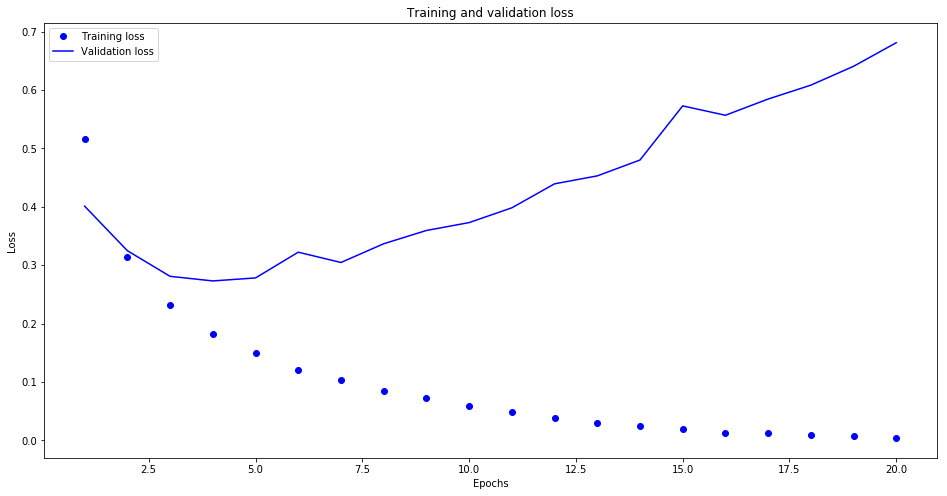

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

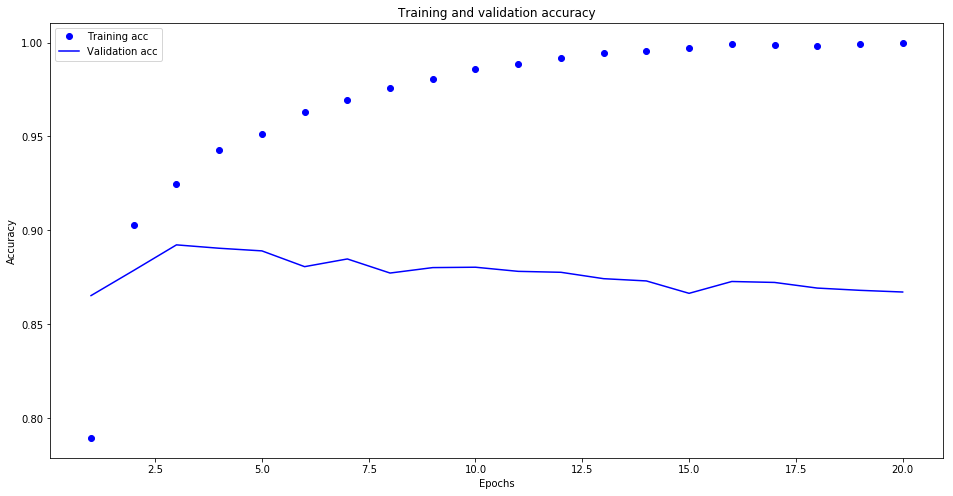

In [32]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
25000/25000 [==============================] - 2s - loss: 0.4719 - acc: 0.8105     
Epoch 2/4
25000/25000 [==============================] - 1s - loss: 0.2652 - acc: 0.9078     
Epoch 3/4
25000/25000 [==============================] - 2s - loss: 0.2022 - acc: 0.9278     
Epoch 4/4
25000/25000 [==============================] - 3s     


In [34]:
results

[0.29112329282760618, 0.88480000000000003]

In [35]:
model.predict(x_test)

array([[ 0.92223477],
       [ 0.83030128],
       [ 0.99947578],
       ..., 
       [ 0.44211391],
       [ 0.0036863 ],
       [ 0.81727582]], dtype=float32)

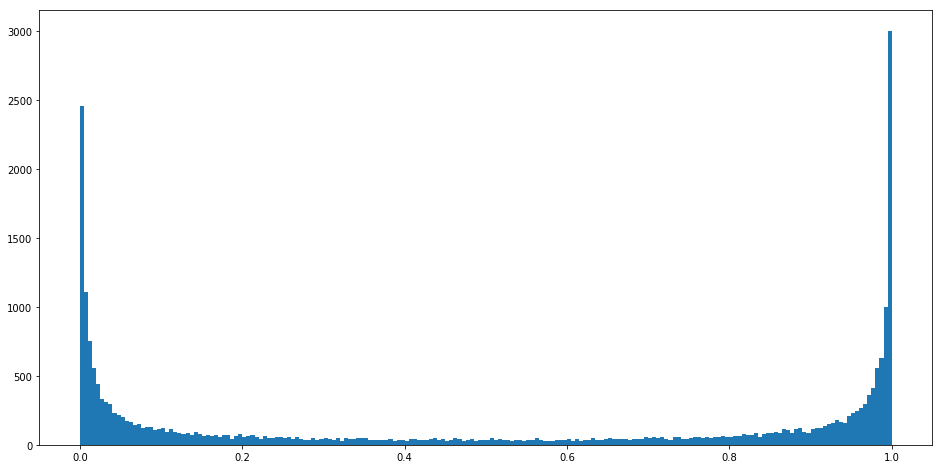

In [39]:
plt.hist(model.predict(x_test), bins=200);